In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
data = pd.read_csv("Download Data - INDEX_US_S&P US_SPX.csv")


In [30]:
data.head()

,Date,Open,High,Low,Close
0,06/16/2025,"6,004.00","6,050.83","6,004.00","6,033.11"
1,06/13/2025,"6,000.56","6,026.16","5,963.21","5,976.97"
2,06/12/2025,"6,009.90","6,045.43","6,003.88","6,045.26"
3,06/11/2025,"6,049.38","6,059.40","6,002.32","6,022.24"
4,06/10/2025,"6,009.91","6,043.01","6,000.28","6,038.81"


In [31]:
price_cols = ['Open', 'High', 'Low', 'Close']

for col in price_cols:
    data[col] = data[col].str.replace(',', '')       
    data[col] = data[col].str.strip()                 
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [32]:
data.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [33]:
data.values

array([['06/16/2025', 6004.0, 6050.83, 6004.0, 6033.11],
       ['06/13/2025', 6000.56, 6026.16, 5963.21, 5976.97],
       ['06/12/2025', 6009.9, 6045.43, 6003.88, 6045.26],
       ...,
       ['06/20/2024', 5499.99, 5505.53, 5455.56, 5473.17],
       ['06/18/2024', 5476.15, 5490.38, 5471.32, 5487.03],
       ['06/17/2024', 5431.11, 5488.5, 5420.4, 5473.23]], dtype=object)

In [34]:
data['Date'] = pd.to_datetime(data['Date'])

In [35]:
data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

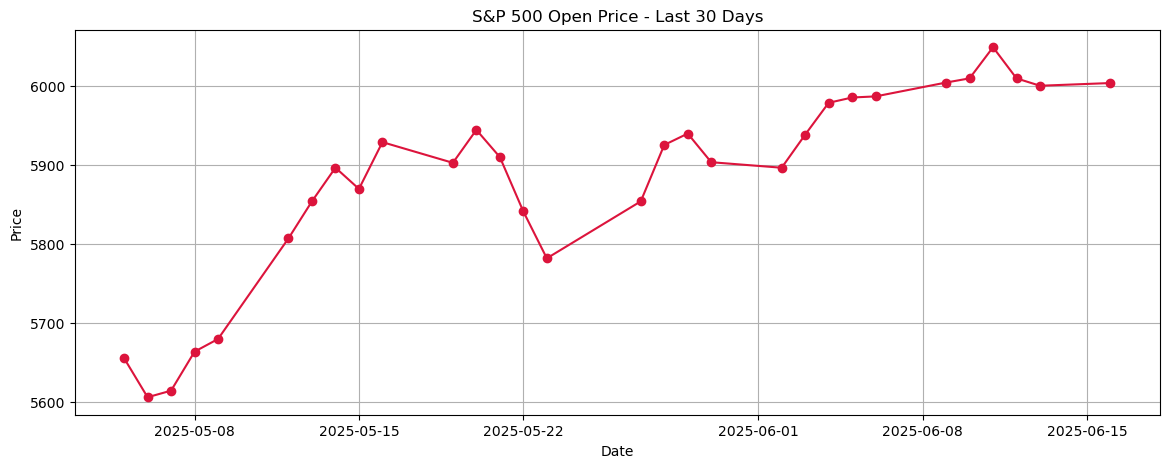

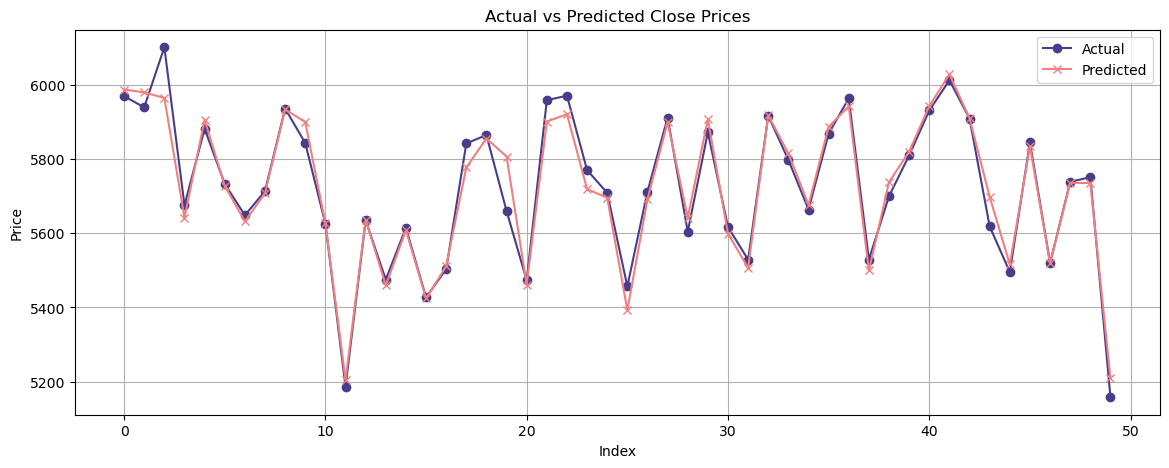

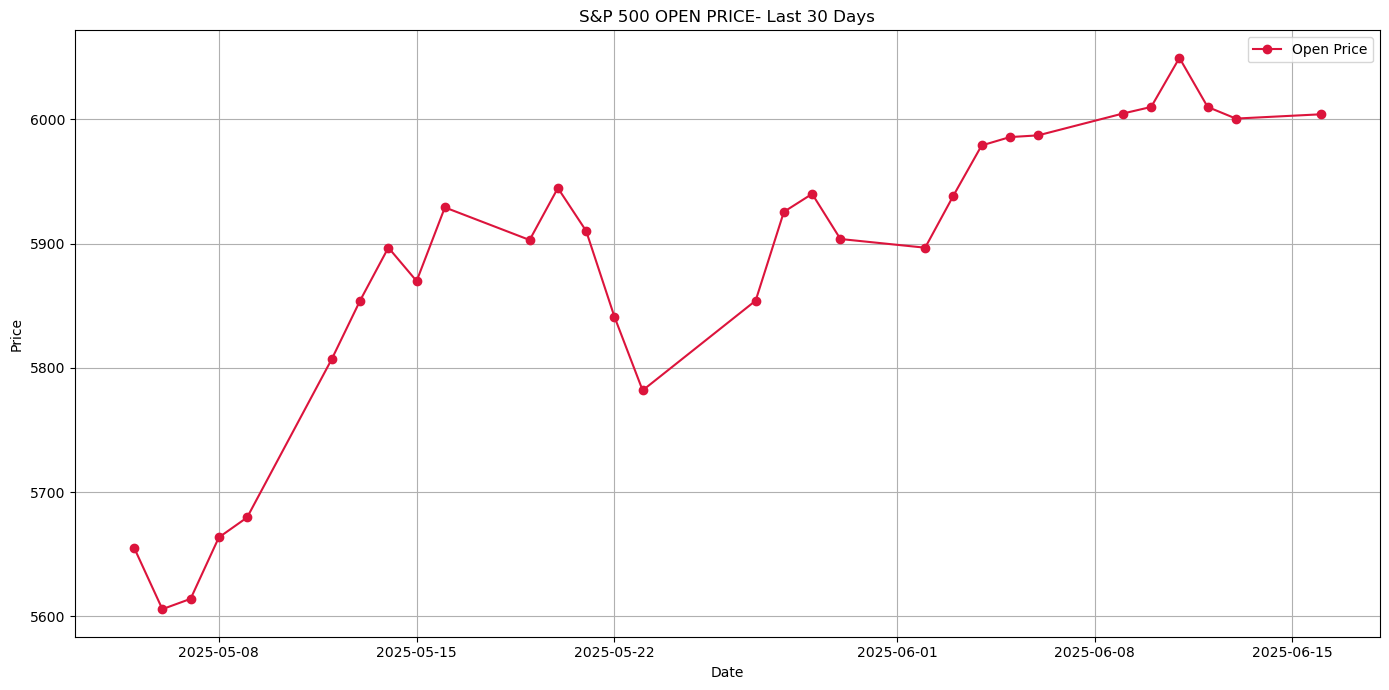

In [36]:
sample = data.head(30)

plt.figure(figsize=(14, 7))
plt.plot(sample['Date'], sample['Open'], label='Open Price', color='crimson', marker ='o')
plt.title('S&P 500 OPEN PRICE- Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

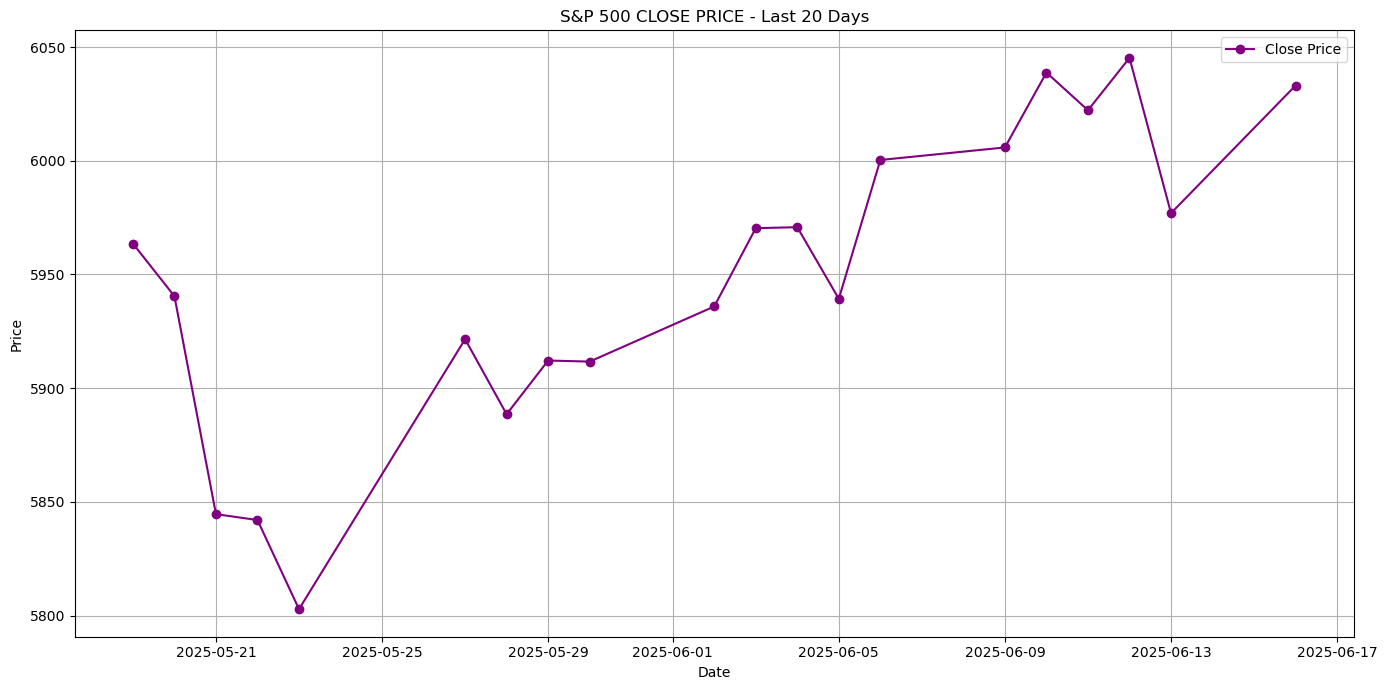

In [37]:
sample = data.head(20)

plt.figure(figsize=(14, 7))
plt.plot(sample['Date'], sample['Close'], label='Close Price', color='purple', marker ='o')
plt.title('S&P 500 CLOSE PRICE - Last 20 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

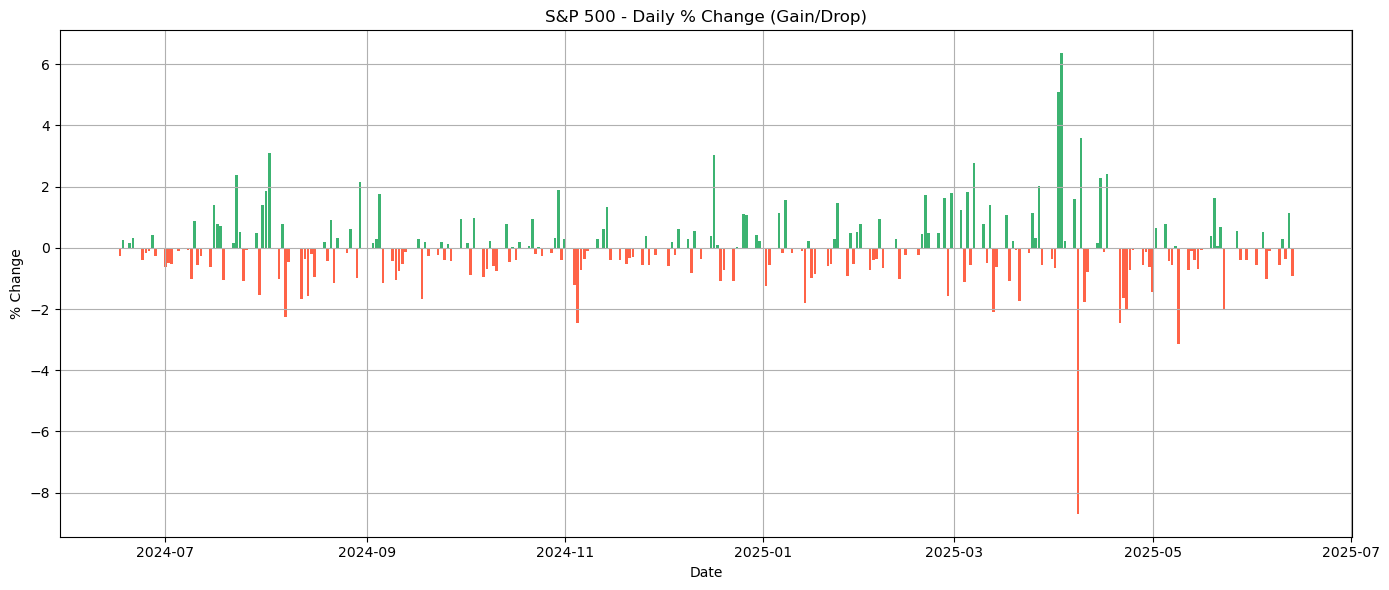

In [38]:
data['Daily_Change_%'] = data['Close'].pct_change() * 100


plt.figure(figsize=(14,6))
plt.bar(data['Date'], data['Daily_Change_%'], color=['mediumseagreen' if val >= 0 else 'tomato' for val in data['Daily_Change_%']])
plt.title('S&P 500 - Daily % Change (Gain/Drop)')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)
plt.tight_layout()
plt.show()



In [39]:
data

,Date,Open,High,Low,Close,Daily_Change_%
0,2025-06-16,6004.00,6050.83,6004.00,6033.11,NaN
1,2025-06-13,6000.56,6026.16,5963.21,5976.97,-0.930532
2,2025-06-12,6009.90,6045.43,6003.88,6045.26,1.142552
3,2025-06-11,6049.38,6059.40,6002.32,6022.24,-0.380794
4,2025-06-10,6009.91,6043.01,6000.28,6038.81,0.275147
...,...,...,...,...,...,...
245,2024-06-24,5459.58,5490.66,5447.59,5447.87,-0.391823
246,2024-06-21,5466.77,5478.31,5452.03,5464.62,0.307460
247,2024-06-20,5499.99,5505.53,5455.56,5473.17,0.156461
248,2024-06-18,5476.15,5490.38,5471.32,5487.03,0.253235


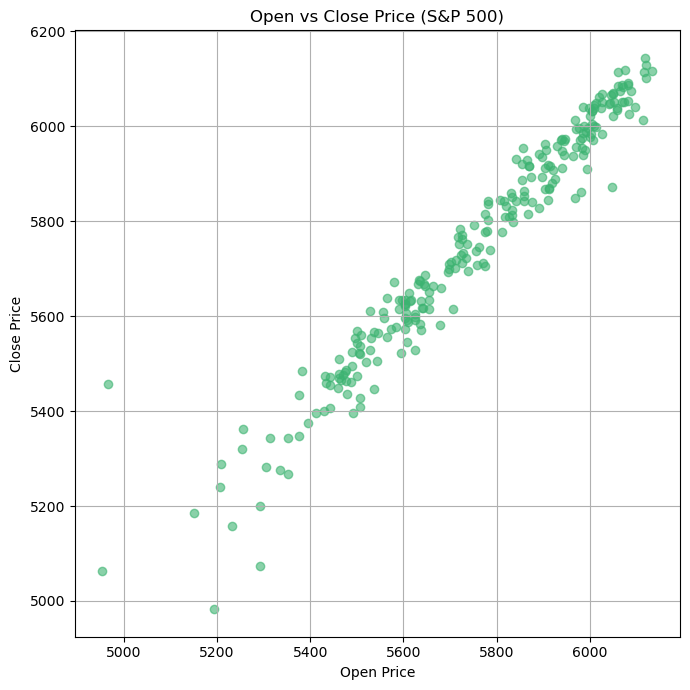

In [40]:
plt.figure(figsize=(7,7))
plt.scatter(data['Open'], data['Close'], alpha=0.6, color='mediumseagreen')
plt.title('Open vs Close Price (S&P 500)')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
data['Next_Close_Price']= data['Close'].shift(-1)
data= data.dropna()

In [42]:
data

,Date,Open,High,Low,Close,Daily_Change_%,Next_Close_Price
1,2025-06-13,6000.56,6026.16,5963.21,5976.97,-0.930532,6045.26
2,2025-06-12,6009.90,6045.43,6003.88,6045.26,1.142552,6022.24
3,2025-06-11,6049.38,6059.40,6002.32,6022.24,-0.380794,6038.81
4,2025-06-10,6009.91,6043.01,6000.28,6038.81,0.275147,6005.88
5,2025-06-09,6004.63,6021.31,5994.18,6005.88,-0.545306,6000.36
...,...,...,...,...,...,...,...
244,2024-06-25,5460.73,5472.88,5446.56,5469.30,-0.156994,5447.87
245,2024-06-24,5459.58,5490.66,5447.59,5447.87,-0.391823,5464.62
246,2024-06-21,5466.77,5478.31,5452.03,5464.62,0.307460,5473.17
247,2024-06-20,5499.99,5505.53,5455.56,5473.17,0.156461,5487.03


In [43]:
X = data[['Open', 'High', 'Low', 'Close']]  
y = data['Next_Close_Price'] 

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "KNN": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    results[name] = {"model": model, "R2": r2}
    print(f"{name}: R² = {r2:.4f}")


best_model = max(results.items(), key=lambda x: x[1]["R2"])
print(f"\n🏆 Best Model: {best_model[0]} (R² = {best_model[1]['R2']:.4f})")


Linear Regression: R² = 0.9631
Random Forest: R² = 0.9342
Support Vector Machine: R² = 0.2349
KNN: R² = 0.9475

🏆 Best Model: Linear Regression (R² = 0.9631)


In [46]:
final_model = best_model[1]['model']
y_pred = final_model.predict(X_test)
comparison_df = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred.flatten()
})
(comparison_df)

,Actual,Predicted
0,5525.21,5535.689479
1,5970.81,5986.699224
2,5713.64,5707.948331
3,6025.99,6038.667821
4,5808.12,5823.053935
5,5487.03,5496.074801
6,5648.40,5633.222926
7,5836.22,5862.560175
8,5911.69,5903.544277
9,5567.19,5562.425102


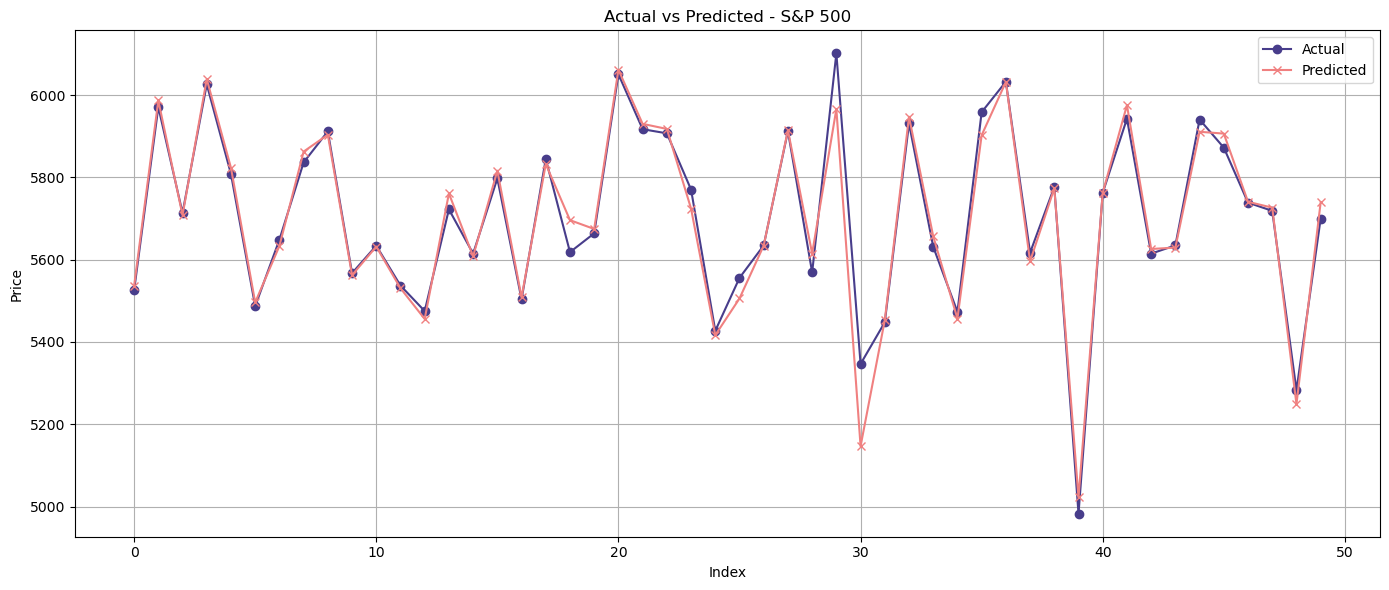

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual', marker='o', color='darkslateblue') 
plt.plot(y_pred, label='Predicted', marker='x', color='lightcoral')
plt.title('Actual vs Predicted - S&P 500')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [48]:
def predict_next_close():
    print("\n📈 S&P 500 Close Price Predictor")
    print("Enter today's market values:")

    while True:
        try:
            open_price = float(input("🔓 Open Price: "))
            break
        except ValueError:
            print("⚠️ Open Price must be a number. Try again.")

    while True:
        try:
            high_price = float(input("📈 High Price: "))
            break
        except ValueError:
            print("⚠️ High Price must be a number. Try again.")

    while True:
        try:
            low_price = float(input("📉 Low Price: "))
            break
        except ValueError:
            print("⚠️ Low Price must be a number. Try again.")

    while True:
        try:
            close_price = float(input("🔒 Close Price: "))
            break
        except ValueError:
            print("⚠️ Close Price must be a number. Try again.")

    input_data = [[open_price, high_price, low_price, close_price]]
    predicted_close = final_model.predict(input_data)[0]

    print(f"\n📊 Predicted Close Price for Tomorrow: ${predicted_close:.2f}")


In [ ]:
predict_next_close()


📈 S&P 500 Close Price Predictor
Enter today's market values:
